In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


google drive에 데이터들을 마운트함 (data.csv의 path를 인식하기 위해서)

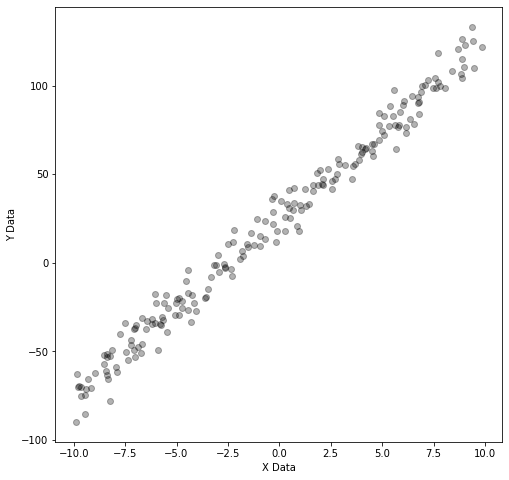

In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style


path = "/content/drive/My Drive/data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3, color='black')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.show()


**Task 1**

data.csv 파일에서 데이터를 불러와서 검정색으로 좌표들을 출력한다.

과제 규정에 맞추어 좌표들을 검정색으로 출력했다.

9.934635539221306
24.90739329394621


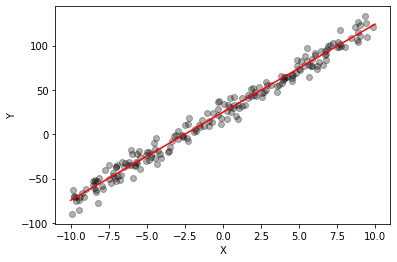

In [0]:


gradient_theta0 = float(0)
gradient_theta1 = float(0)
theta0 = float(-30)
theta1 = float(-30)
new_theta0 = float(0)
new_theta1 = float(0)
learning_rate = float(0.001)
m = float(len(x_data))
space_theta0 = [float]
space_theta1 = [float]

for i in range(100000):
  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    gradient_theta0 += (1/m) * x * (((theta0 * x) + theta1) - y)
    gradient_theta1 += (1/m) * (((theta0 * x) + theta1) - y)
  new_theta0 = theta0 - (learning_rate * gradient_theta0)
  new_theta1 = theta1 - (learning_rate * gradient_theta1)
  gradient_theta0 = float(0)
  gradient_theta1 = float(0) #초기화
  theta0 = new_theta0
  theta1 = new_theta1
  space_theta0.append(theta0)
  space_theta1.append(theta1)

#print(space_theta0[0])
#print(len(space_theta0))
print(theta0)
print(theta1)
#print(theta0)
#print(theta1)

x = np.linspace(-10,10,40)
y = theta0*x+theta1
plt.scatter(x_data, y_data, alpha=0.3, color='black')
plt.plot(x,y, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()




**Task 2**

Gradient descent를 실행하여 theta0와 theta1를 계속해서 바꾼다.
그리고 최종 theta0와 theta1를 구하여 직선의 방정식을 그리고 초기에 주어진 표본과 비교한다.
나중에 theta0와 theta1이 어떻게 변화하였는지 나타내기 위해서 for문을 돌때마다 append 시켜서 배열에 저장한다

과제규정에 따라서 표본좌표들은 검정색, 직선의 방정식은 빨간색으로 표시했다.
Running Rate는 0.001로 설정했고 정확한 방정식을 구하기 위해서 for문을 100000번 돌렸다.

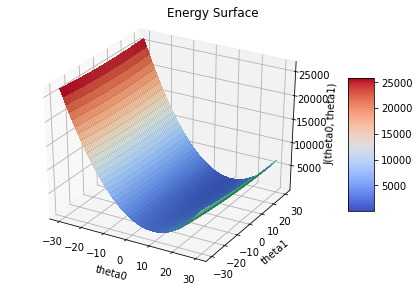

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d')

theta0 = np.arange(float(-30), float(30), float(0.1))
theta1 = np.arange(float(-30), float(30), float(0.1))
theta0, theta1 = np.meshgrid(theta0, theta1)
J = float(0)
for k in range(len(x_data)):
  x = x_data[k]
  y = y_data[k]
  J += (1/(2*m))*((theta0*x)+theta1-y)*((theta0*x)+theta1-y)
surf = ax.plot_surface(theta0,theta1,J,cmap='coolwarm',linewidth=0,antialiased=False)
wire = ax.plot_wireframe(theta0,theta1,J,color='g',linewidth=0.1)
fig.colorbar(surf,shrink=0.5,aspect=5)
fig.tight_layout()
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J(theta0, theta1)')
plt.suptitle('Energy Surface')
plt.show()


**Task 3**

Energy Surface를 그리기 위해서 시그마를 이용해 식을 만들고 주어진 규정에 맞춰서 theta0와 theta1의 좌표를 [-30:0.1:30]으로 맞추어 그래프를 그렸다.
이때 Energy Surface의 높이를 구분하기 위해서 색깔을 달리 설정하라고 지시하신 것도 같이 그래프를 plot할 때 coolwarm으로 맞췄다.
또한 x축을 theta0, y축을 theta1, z축을 J(theta0, theta1)으로 나타냈다.

In [0]:
result = float(0)
J2 = [float]

for p in range(len(space_theta0)-1):
  for r in range(len(x_data)):
    x = x_data[r]
    y = y_data[r]
    result += (1/(2*m))*((space_theta0[p+1]*x)+space_theta1[p+1]-y)*((space_theta0[p+1]*x)+space_theta1[p+1]-y)
  J2.append(result)
  result = float(0)

#print(space_theta0[1])
#print(space_theta1[1])
#print(J2[1])

del space_theta0[0]
del space_theta1[0]
del J2[0]

#print(space_theta0)


**부가적인 작업**

앞서 theta0와 theta1의 무브먼트를 확인하기 위해서 배열에 저장했지만 그에 대한 결과값을 따로 저장하지 않아서 J2라는 배열에 Cost 함수 결과값을 순서대로 저장했다.

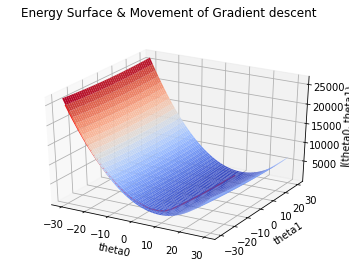

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta0 = np.arange(float(-30), float(30), float(0.1))
theta1 = np.arange(float(-30), float(30), float(0.1))
theta0, theta1 = np.meshgrid(theta0, theta1)
J = float(0)
for k in range(len(x_data)):
  x = x_data[k]
  y = y_data[k]
  J += (1/(2*m))*((theta0*x)+theta1-y)*((theta0*x)+theta1-y)

ax.plot(space_theta0, space_theta1, J2, color="red")
ax.plot_surface(theta0,theta1,J,cmap='coolwarm',linewidth=0)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J(theta0, theta1)')
plt.suptitle('Energy Surface & Movement of Gradient descent')

plt.show()

**Task 4**

위에서 불러온 Energy Surface를 그대로 불러오고 이에 추가적으로 저장했었던 space_theta0, space_theta1 그리고 그에 대한 Cost 함수의 결과값 J2를 이용하여 어떻게 theta0와 theta1이 움직였는지 직선으로 같이 나타냈다.

이때 theta0와 theta1은 -30으로 초기화하고 그라디언트 디센트가 convergence 할때까지 직선을 그렸다. 직선은 빨간색으로 설정했고, Running Weight를 적당하게 0.001로 설정했다.

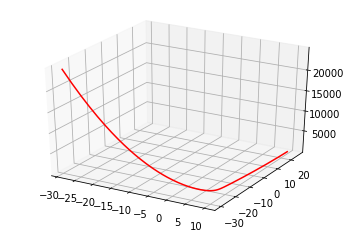

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(space_theta0, space_theta1, J2, mfc="none", color="red")
plt.show()


**부가적인 그래프**

위에 그래프에서 빨간 직선이 같은 식을 사용했음에도 흐릿하게 나와서
직선만을 따로 출력해보았다.

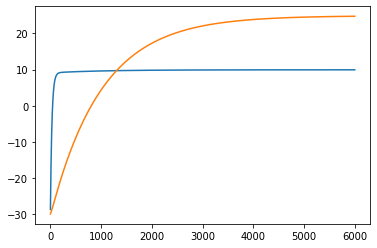

In [0]:
x = range(6000)
x2 = range(6000)
y = space_theta0[:6000]
y2 = space_theta1[:6000]
plt.plot(x,y,x2,y2)
plt.show()